<a href="https://colab.research.google.com/github/Turaca444/repositorio/blob/main/REDNEURONALCLIENTESBANCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                            - INSTITUTO SUPERIOR POLITÉCNICO CÓRDOBA - 

                                       INTEGRANTES: CHAYLE, CHRISTIAN - MEDINA, JORGE

        PROYECTO FINAL - RED NEURONAL (aplicar las redes neuronales a la predicción y descripción del siguiente problema)

- 10.000 clientes de un banco.
- Clientes de 3 países, edad, género, balance, productos contratados, tiene o no tarjeta de crédito, salario estimado.

Con estos datos, el banco ha marcado quienes abandonaron el banco y quienes no.
Se trata de predecir, con información similar de clientes nuevos, si abandonarán el banco o no.


In [35]:
import numpy as np
 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
#from sklearn.externals import joblib
 
import seaborn as sns
import matplotlib.pyplot as plt
 
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None):
    """
    Esta función imprime y traza la matriz de confusión.
     La normalización se puede aplicar configurando `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de Confusión Normalizada'
        else:
            title = 'Matriz de Confusión sin Normalizar'
 
    # Calculando la Matriz de Confusion
    cm = confusion_matrix(y_true, y_pred)
    # solo usar las etiquetas que se tienen en el dataset
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')
 
    print(cm)
 
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(linewidth=.0)
    # Queremos mostrar todos los puntos...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... etiquetando la lista de datos
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
 
    # rotando las etiquedas de los puntos.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
 
    # Loop over dataset dimensiones y crear anotaciones de texto.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax
 
def saveFile(object_to_save, scaler_filename):
    joblib.dump(object_to_save, scaler_filename)
 
def loadFile(scaler_filename):
    return joblib.load(scaler_filename)
 
def plotHistogram(dataset_final):
    dataset_final.hist(figsize=(20,14), edgecolor="black", bins=40)
    plt.show()
 
def plotCorrelations(dataset_final):
    fig, ax = plt.subplots(figsize=(10,8))   # tamaño en pulgadas
    g = sns.heatmap(dataset_final.corr(), annot=True, cmap="YlGnBu", ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()

CARGA DE DATOS Y PREPOCESAMIENTO DE DATOS


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importando Datasets
dataset_csv = pd.read_csv('Clientes_banco.csv')

# Columnas del dataset
print ("\nColumnas del DataSet: ")
print("====================")
print (dataset_csv.columns)
print("=================================================================================")
# Describir el dataset original
print ("\nDataset original:\n", dataset_csv.describe(include='all'))
print("=================================================================================")
# Dataset reducido
dataset = dataset_csv.iloc[:,3:14]
dataset_columns = dataset.columns
dataset_values = dataset.values

# Describir el dataset truncado

print ("\nDataset reducido: ")
print("\n",dataset.head())
print("=================================================================================")
# Revisamos los tipos de datos de las Columnas
print ("\nTipos de Columnas del Dataset: ")
print(dataset.dtypes)
print("=================================================================================")


Columnas del DataSet: 
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Dataset original:
           RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    65

IMPORTACIÓN DEL CONJUNTO DE DATOS - CLIENTES 


In [37]:
dataset_csv= pd.read_csv('Clientes_banco.csv')
dataset_csv

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


CODIFICANDO DATOS CATEGORICOS - CONVERTIMOS PAIS Y GENERO A DATOS NUMERICOS


In [38]:
labelEncoder_X_1 = LabelEncoder()
dataset_values[:, 1] = labelEncoder_X_1.fit_transform(dataset_values[:, 1])
labelEncoder_X_2 = LabelEncoder()
dataset_values[:, 2] = labelEncoder_X_2.fit_transform(dataset_values[:, 2])

print ("\nDataset Categorizado:\n=====================\n", dataset_values)



Dataset Categorizado:
 [[619 0 0 ... 1 101348.88 1]
 [608 2 0 ... 1 112542.58 0]
 [502 0 0 ... 0 113931.57 1]
 ...
 [709 0 0 ... 1 42085.58 1]
 [772 1 1 ... 0 92888.52 1]
 [792 0 0 ... 0 38190.78 0]]


ESCALAMIENTO/NORMALIZACIÓN DE FEACTURES (STANDARDSCALER)

In [39]:
stdScaler = StandardScaler()
dataset_values[:,0:10] = stdScaler.fit_transform(dataset_values[:,0:10])


# Dataset final normalizado
dataset_final = pd.DataFrame(dataset_values,columns=dataset_columns, dtype=np.float64)
print ("\nDataset Final:")
print(dataset_final.describe(include='all'))
print("\n", dataset_final.head())


Dataset Final:
        CreditScore     Geography        Gender           Age        Tenure  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -4.824585e-16  8.526513e-17  1.314504e-16  2.318146e-16 -1.078249e-16   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -3.109504e+00 -9.018862e-01 -1.095988e+00 -1.994969e+00 -1.733315e+00   
25%   -6.883586e-01 -9.018862e-01 -1.095988e+00 -6.600185e-01 -6.959818e-01   
50%    1.522218e-02 -9.018862e-01  9.124191e-01 -1.832505e-01 -4.425957e-03   
75%    6.981094e-01  3.065906e-01  9.124191e-01  4.842246e-01  6.871299e-01   
max    2.063884e+00  1.515067e+00  9.124191e-01  5.061197e+00  1.724464e+00   

            Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count  1.000000e+04   1.000000e+04  1.000000e+04    1.000000e+04   
mean  -6.252776e-17   1.634248e-17 -5.258016e-17   -7.389644e-17   
std    1.000050e+00   1.000050e+00  1.000050e+00    1.000050e+00   


DISTRIBUCIONES DEL DATASET Y CORRELACIONES


 Histogramas:


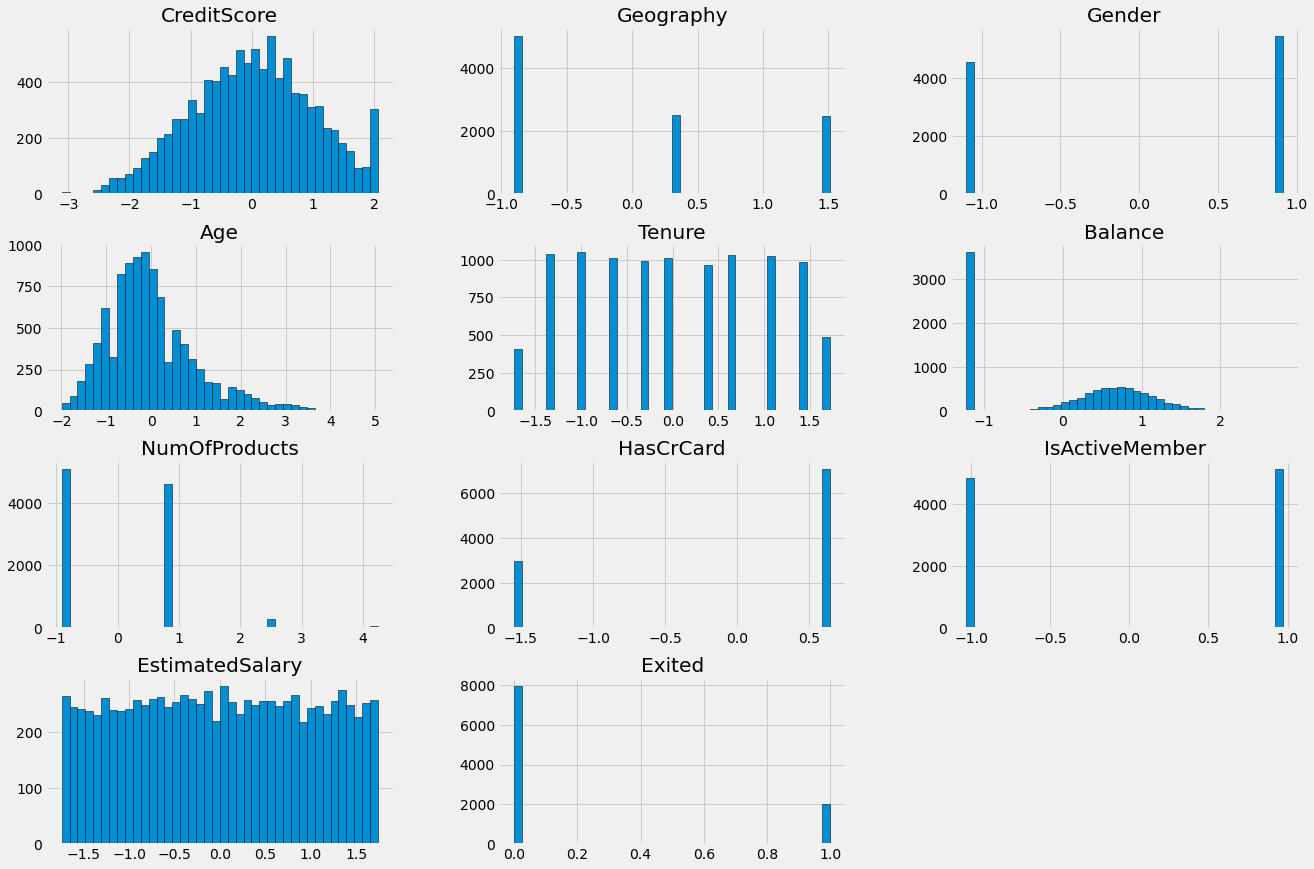


 Correlaciones:


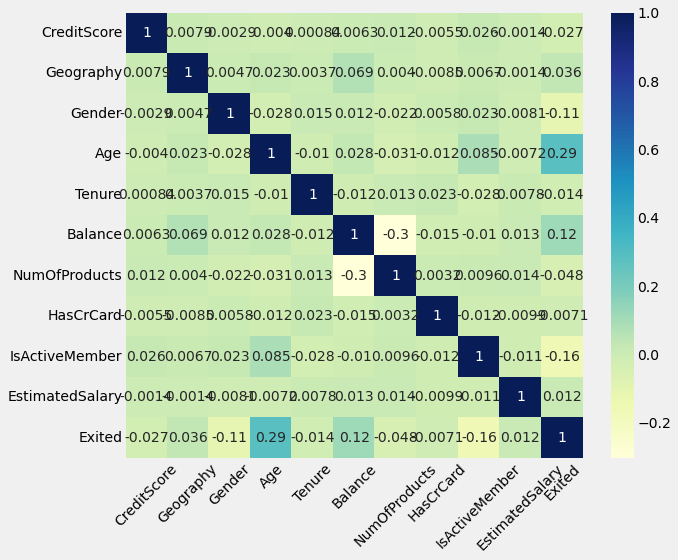

In [40]:
print("\n Histogramas:")
plotHistogram(dataset_final)

print("\n Correlaciones:")
plotCorrelations(dataset_final)

In [41]:
# Obteniendo valores a procesar
X = dataset_final.iloc[:, 0:10].values
y = dataset_final.iloc[:, 10].values

# Dividiendo el Dataset en sets de Training y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Inicializando la Red Neuronal
red = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales 
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)

# Agregado la Capa de entrada y la primera capa oculta
# 10 Neuronas en la capa de entrada y 8 Neuronas en la primera capa oculta
red.add(Dense(units = 8, kernel_initializer = initial_weights, activation = 'relu', input_dim = 10))

# Agregando capa oculta
red.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa oculta
red.add(Dense(units = 4, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
red.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))

In [43]:
# Imprimir Arquitectura de la Red
red.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 8)                 88        
                                                                 
 dense_57 (Dense)            (None, 5)                 45        
                                                                 
 dense_58 (Dense)            (None, 4)                 24        
                                                                 
 dense_59 (Dense)            (None, 1)                 5         
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
red.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
red.fit(X_train, y_train, batch_size = 80, epochs = 100)

Epoch 1/100
100/100 [==============================] - 1s 1ms/step - loss: 0.6513 - accuracy: 0.7909
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7960
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7960
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7960
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7960
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.7960
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7960
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.7960
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.7960
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.3983 - accura

In [45]:
# Haciendo predicción de los resultados del Test
y_pred = red.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

# 50 primeros resultados a comparar
print("\nPredicciones (50 primeros):")
print("\n\tReal", "\t", "Predicción(N)","\t", "Predicción(O)")
for i in range(50):
    print(i, '\t', y_test[i], '\t ', y_pred_norm[i], '\t \t', y_pred[i])


Predicciones (50 primeros):

	Real 	 Predicción(N) 	 Predicción(O)
0 	 0 	  [0] 	 	 [0.22786832]
1 	 1 	  [0] 	 	 [0.25976545]
2 	 0 	  [0] 	 	 [0.15142652]
3 	 0 	  [0] 	 	 [0.03517985]
4 	 0 	  [0] 	 	 [0.07247898]
5 	 1 	  [1] 	 	 [0.7077868]
6 	 0 	  [0] 	 	 [0.02406394]
7 	 0 	  [0] 	 	 [0.07138941]
8 	 1 	  [0] 	 	 [0.2385498]
9 	 1 	  [1] 	 	 [0.79417586]
10 	 0 	  [0] 	 	 [0.02572963]
11 	 0 	  [0] 	 	 [0.28886604]
12 	 0 	  [0] 	 	 [0.30299452]
13 	 0 	  [0] 	 	 [0.17389998]
14 	 1 	  [1] 	 	 [0.72083807]
15 	 1 	  [0] 	 	 [0.38822743]
16 	 0 	  [0] 	 	 [0.09874409]
17 	 0 	  [0] 	 	 [0.06385931]
18 	 0 	  [0] 	 	 [0.13055879]
19 	 0 	  [0] 	 	 [0.02301919]
20 	 0 	  [1] 	 	 [0.51585466]
21 	 0 	  [0] 	 	 [0.00423822]
22 	 0 	  [0] 	 	 [0.08072439]
23 	 0 	  [0] 	 	 [0.06479093]
24 	 0 	  [0] 	 	 [0.00310233]
25 	 0 	  [0] 	 	 [0.17340776]
26 	 0 	  [0] 	 	 [0.1762552]
27 	 0 	  [0] 	 	 [0.0451037]
28 	 0 	  [0] 	 	 [0.3189684]
29 	 0 	  [0] 	 	 [0.39349648]
30 	 0 	  [0] 	 	

In [46]:
# Aplicando la Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_norm)
print ("\nMatriz de Confusión: \n", cm)


Matriz de Confusión: 
 [[1514   81]
 [ 197  208]]


Confusion matrix

 [[1514   81]
 [ 197  208]]

True Positives(TP) =  1514

True Negatives(TN) =  208

False Positives(FP) =  81

False Negatives(FN) =  197


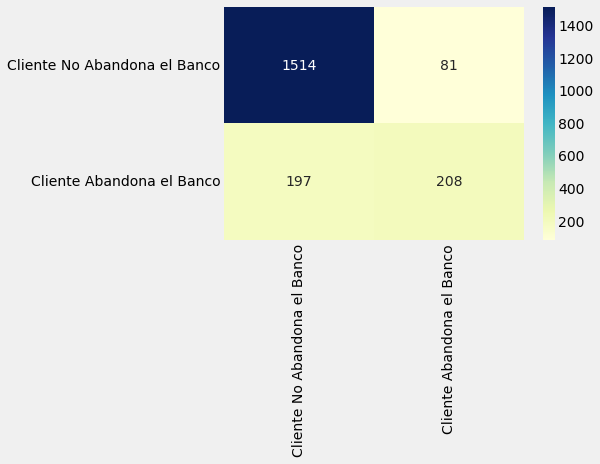

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_norm)


print('Confusion matrix\n\n', cm)
print('=================================')
print('\nTrue Positives(TP) = ', cm[0,0])
print('=================================')
print('\nTrue Negatives(TN) = ', cm[1,1])
print('=================================')
print('\nFalse Positives(FP) = ', cm[0,1])
print('=================================')
print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=[ 'Cliente No Abandona el Banco','Cliente Abandona el Banco'], 
                                 index=[ 'Cliente No Abandona el Banco','Cliente Abandona el Banco'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')        

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_norm))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [49]:
red.evaluate(X_test, y_pred_norm)

63/63 [==============================] - 0s 1ms/step - loss: 0.1786 - accuracy: 1.0000


[0.17863300442695618, 1.0]